In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
base_ordinal.shape

(2580, 83)

In [4]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [5]:
len(y)

2580

In [6]:
X.shape

(2580, 82)

In [7]:
X.shape[1]

82

In [8]:
AR2_Base = []
MAE_Base = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_No_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=True)
    RF_No_Bootstrap.fit(X_train_scaled, Y_train)
    RF_No_Bootstrap_Score = RF_No_Bootstrap.score(X_test_scaled, Y_test)
    
    pred = RF_No_Bootstrap.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1 - RF_No_Bootstrap_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)

In [9]:
Ordinal = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Ordinal

,AR2_Base,MAE_Base
0,0.915653,13947.131333
1,0.891728,14852.881814
2,0.900785,15082.284791
3,0.850997,16027.076124
4,0.829329,16027.881023
5,0.867055,15708.707767
6,0.910653,14949.656047
7,0.873584,15411.396667
8,0.860222,16683.725008
9,0.868251,14283.728047


In [10]:
ordinal_drop1 = pd.read_csv('OrdinalDrop1.csv')

In [11]:
ordinal_drop1.shape

(2579, 83)

In [12]:
X2 = ordinal_drop1.drop(['SalePrice'], axis=1).values
y2 = ordinal_drop1.SalePrice.values

In [13]:
len(y2)

2579

In [14]:
X2.shape

(2579, 82)

In [15]:
X2.shape[1]

82

In [16]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_No_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=True)
    RF_No_Bootstrap.fit(X_train_scaled, Y_train)
    RF_No_Bootstrap_Score = RF_No_Bootstrap.score(X_test_scaled, Y_test)
    
    pred = RF_No_Bootstrap.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1 - RF_No_Bootstrap_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)


In [17]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.915078,14700.591535
1,0.908039,14036.085984
2,0.884333,15464.666868
3,0.888966,14222.221240
4,0.881865,14840.096264
5,0.885971,15866.077659
6,0.904962,14609.396806
7,0.887631,15377.016496
8,0.913873,13894.021628
9,0.885042,15295.642605


In [18]:
ordinal_drop_IF = pd.read_csv('OrdinalDropIF.csv')

In [19]:
ordinal_drop_IF.shape

(2568, 83)

In [20]:
ordinal_drop_IF

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0
3,3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,4,535377150,1039,114000,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0
4,4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,5,534177230,1665,227000,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,759,903205040,952,121000,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0
2564,2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,760,905402060,1733,139600,68.516053,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0
2565,2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,761,909275030,2002,145000,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0
2566,2578,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.

In [21]:
X3 = ordinal_drop_IF.drop(['SalePrice'], axis=1).values
y3 = ordinal_drop_IF.SalePrice.values

In [22]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_No_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=True)
    RF_No_Bootstrap.fit(X_train_scaled, Y_train)
    RF_No_Bootstrap_Score = RF_No_Bootstrap.score(X_test_scaled, Y_test)
    
    pred = RF_No_Bootstrap.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1 - RF_No_Bootstrap_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)


In [23]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.902348,14205.426246
1,0.894586,15163.913567
2,0.884527,14356.839829
3,0.902876,14997.394611
4,0.903312,14845.373738
5,0.878097,15742.221153
6,0.913472,13644.053037
7,0.885412,15123.725218
8,0.887817,14214.162679
9,0.908043,14286.302056


In [24]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.915653,13947.131333,0.915078,14700.591535,0.902348,14205.426246
1,0.891728,14852.881814,0.908039,14036.085984,0.894586,15163.913567
2,0.900785,15082.284791,0.884333,15464.666868,0.884527,14356.839829
3,0.850997,16027.076124,0.888966,14222.221240,0.902876,14997.394611
4,0.829329,16027.881023,0.881865,14840.096264,0.903312,14845.373738
5,0.867055,15708.707767,0.885971,15866.077659,0.878097,15742.221153
6,0.910653,14949.656047,0.904962,14609.396806,0.913472,13644.053037
7,0.873584,15411.396667,0.887631,15377.016496,0.885412,15123.725218
8,0.860222,16683.725008,0.913873,13894.021628,0.887817,14214.162679
9,0.868251,14283.728047,0.885042,15295.642605,0.908043,14286.302056


In [25]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.887958,15039.621400,0.896866,14968.396708,0.898370,14761.484114
std,0.018974,668.450443,0.012270,730.674283,0.013643,779.240151
min,0.829329,13826.985783,0.868286,13364.082527,0.864472,12957.335327
25%,0.878162,14547.845473,0.886879,14471.289717,0.889840,14266.934879
50%,0.891855,14945.770721,0.897397,14962.758705,0.901103,14650.275880
75%,0.901661,15413.703895,0.907010,15429.094388,0.906509,15256.859646
max,0.915653,16683.934109,0.924219,16845.158481,0.929618,16556.939891


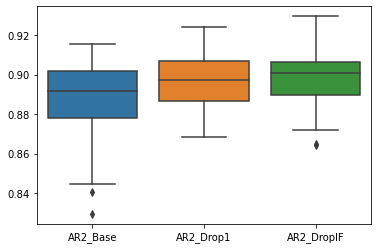

In [26]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1','AR2_DropIF']]);

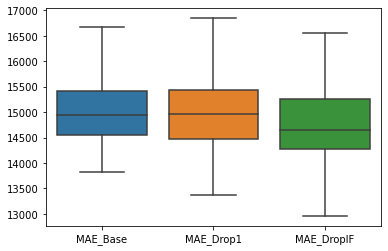

In [27]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);